# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [1]:
import pandas as pd

df = pd.read_csv('data/human_body_temperature.csv')

In [2]:
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


mean: 98.24923076923078


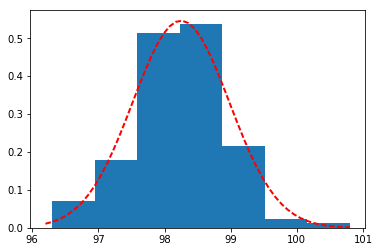

In [3]:
# Your work here.
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import mlab

bodytemp = df.temperature
mu = np.mean(bodytemp)
sigma = np.std(bodytemp)

plt.hist(bodytemp, bins = 7, normed = True)
x = np.linspace(96.2, 100.8, 50)
y = mlab.normpdf(x,np.mean(bodytemp),np.std(bodytemp))
plt.plot(x,y,'r--',linewidth=2)

print("mean:", mu)

The distribution appears to be normal.

Interestingly enough, this mean is not the same as the commonly known body temperature of 98.6. We will want to see how likely it is that we have a sampling error.

In [4]:
from statsmodels.stats.weightstats import ztest

z, p = ztest(bodytemp, value = 98.6)
print(p)

4.9021570141e-08


The p-value is quite low. The z-test should be similar to the t-test in this situation since the sample size is larger than 30.

In [5]:
from scipy.stats import ttest_1samp

t, p = ttest_1samp(bodytemp, 98.6)
print(p)

2.41063204156e-07


<li>  Draw a small sample of size 10 from the data and repeat both tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?

In [6]:
s = np.random.randint(129, size=10)

sample = bodytemp[s]

z_sample, p_sample = ztest(sample, value = 98.6)

print("z-test p value:", p_sample)

t_sample, p_sample = ttest_1samp(sample, 98.6)
print("t-test p value:", p_sample)

z-test p value: 0.600401848097
t-test p value: 0.613055042738


With a sample size of 10, we will want to use a t-test as a z-test increases the likelihood of a type I error.

In [7]:
from scipy.stats import norm

norm.interval(.99, loc=mu, scale=sigma)

(96.367953800252295, 100.13050773820926)

I believe we should use a two-tailed test as both a very low and a very high body temperature are concerning. The confidence interval for a reasonable temperature is between 96.4°F and 100.1°F.

Difference is 0.289230769230727 degrees.
p = 0.0239318831224


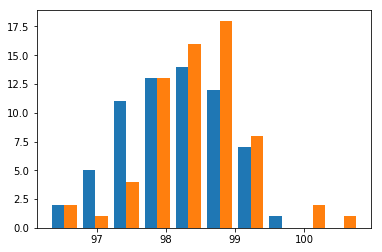

In [8]:
from scipy.stats import ttest_ind

males = df[df.gender == 'M']
females = df[df.gender == 'F']

mtemps = males.temperature
ftemps = females.temperature

plt.hist([mtemps, ftemps], label = ['male', 'female'])

t, p = ttest_ind(mtemps, ftemps)
print("Difference is {} degrees.".format(ftemps.mean() - mtemps.mean()))
print("p =", p)

In [10]:
print(sigma)
print("Male mean:", mtemps.mean())
print("Female mean:", ftemps.mean())

0.7303577789050377
Male mean: 98.1046153846154
Female mean: 98.39384615384613


This is an interesting result. It appears that female body temperatures are nearly 0.3 degrees higher on average than those of males. From a diagnostic standpoint we would not expect this to make much of a difference between men and women since this is well within the standard deviation of 0.73 but it is important to note.